In [1]:
import os
import pandas as pd
import json
import tqdm
import numpy as np
import re

In [2]:
records = os.listdir("TEMP_HYPER/")
records = [_ for _ in records if _.split(".")[-1]=='json']
records = sorted(records)
records

['ASML_REG_FriedmanGra_EW10000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES11_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES3_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES5_B15_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES5_B20_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES5_B25_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES5_B5_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES7_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW1000_ES9_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW100_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW3000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW5000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGra_EW7000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGsg_EW10000_ES5_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGsg_EW1000_ES11_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGsg_EW1000_ES3_B10_PM-ensemble.json',
 'ASML_REG_FriedmanGsg_EW1000

In [3]:
len(records)

196

In [4]:
df_raw = pd.DataFrame()

In [5]:
for record in tqdm.tqdm(records):
    # To read the dictionary from the JSON file
    with open(f'TEMP_HYPER/{record}', 'r') as json_file:
        loaded_record = json.load(json_file)
    
    #if loaded_record['model'] in ['AutoStreamML','OnlineAutoML','EvoAutoML','Chcha']:
    rec = {
        #"run":record.split("_")[-1],
            "model":loaded_record['model'],
           "dataset":loaded_record['dataset'],
           "r2_score":loaded_record['regressionEvaluator']['coefficient of determination'],
        "rmse":loaded_record['regressionEvaluator']['root mean squared error'],
         "exploration_window":loaded_record['hyperparameters']['exploration_window'],
        "ensemble_size":loaded_record['hyperparameters']['ensemble_size'],
         "budget":loaded_record['hyperparameters']['budget'],
        "prediction_mode":loaded_record['hyperparameters']['prediction_mode'],
          "time":abs(sum([i for i in loaded_record['time']])),
           "memory":abs(sum([i/1024/1024  for i in loaded_record['memory']]))
          }
    df_raw = df_raw._append(rec,ignore_index=True)

100%|█████████████████████████████████████████| 196/196 [00:09<00:00, 21.36it/s]


In [6]:
df = df_raw.copy()

In [7]:
df

,model,dataset,r2_score,rmse,exploration_window,ensemble_size,budget,prediction_mode,time,memory
0,ASML_REG,FriedmanGra,0.789813,2.283745,10000,5,10,ensemble,1761.484301,486.601562
1,ASML_REG,FriedmanGra,0.828298,2.064104,1000,11,10,ensemble,7167.456307,2603.414062
2,ASML_REG,FriedmanGra,0.832339,2.039673,1000,3,10,ensemble,2286.706051,321.062500
3,ASML_REG,FriedmanGra,0.837457,2.008299,1000,5,10,ensemble,2738.451130,773.707031
4,ASML_REG,FriedmanGra,0.828337,2.063870,1000,5,15,ensemble,3696.451740,783.367188
...,...,...,...,...,...,...,...,...,...,...
191,ASML_REG,white_wine,0.372898,0.705016,1000,9,10,ensemble,68.169995,19.281250
192,ASML_REG,white_wine,0.368347,0.707569,100,5,10,ensemble,29.984442,11.121094
193,ASML_REG,white_wine,0.358445,0.713094,3000,5,10,ensemble,62.303488,26.398438
194,ASML_REG,white_wine,0.357331,0.713713,5000,5,10,ensemble,54.774497,11.476562


In [8]:
# List of dataset names
dataset_name_list = [
    'ailerons',
    'elevators',
    'fried',
    'hyperA',
    'FriedmanGsg',
    'FriedmanGra',
    'FriedmanLea',
    'kin8nm',
    'abalone',
    'bike',
    'House8L',
    'MetroTraffic',
    'cpu_activity',
    'white_wine',
]

In [9]:
df.groupby('dataset')['model'].count()

dataset
FriedmanGra     14
FriedmanGsg     14
FriedmanLea     14
House8L         14
MetroTraffic    14
abalone         14
ailerons        14
bike            14
cpu_activity    14
elevators       14
fried           14
hyperA          14
kin8nm          14
white_wine      14
Name: model, dtype: int64

In [12]:
#df = df[df['dataset'].isin(dataset_name_list)]

In [13]:
len(df)

196

In [36]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [48]:
# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [49]:
rcParams['font.weight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

In [50]:
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18

# Exploration Window

In [51]:
temp_ew = df[(df['ensemble_size']==5) & (df['budget']==10) & (df['prediction_mode']=='ensemble')]

In [52]:
temp_ew

,model,dataset,r2_score,rmse,exploration_window,ensemble_size,budget,prediction_mode,time,memory
0,ASML_REG,FriedmanGra,0.789813,2.283745,10000,5,10,ensemble,1761.484301,486.601562
3,ASML_REG,FriedmanGra,0.837457,2.008299,1000,5,10,ensemble,2738.451130,773.707031
10,ASML_REG,FriedmanGra,0.802169,2.215599,100,5,10,ensemble,2044.780263,773.750000
11,ASML_REG,FriedmanGra,0.832303,2.039888,3000,5,10,ensemble,2969.677239,786.746094
12,ASML_REG,FriedmanGra,0.819958,2.113640,5000,5,10,ensemble,2897.999451,729.515625
...,...,...,...,...,...,...,...,...,...,...
185,ASML_REG,white_wine,0.376431,0.703027,1000,5,10,ensemble,42.878515,5.367188
192,ASML_REG,white_wine,0.368347,0.707569,100,5,10,ensemble,29.984442,11.121094
193,ASML_REG,white_wine,0.358445,0.713094,3000,5,10,ensemble,62.303488,26.398438
194,ASML_REG,white_wine,0.357331,0.713713,5000,5,10,ensemble,54.774497,11.476562


In [53]:
#temp_ew.sort_values(by='exploration_window')

In [54]:
temp_ew.groupby(['exploration_window'])['rmse'].mean().sort_values(ascending=True)

exploration_window
1000     2689.539824
7000     2759.942629
5000     2761.572821
3000     2762.862402
10000    2788.514679
100      2826.661143
Name: rmse, dtype: float64

In [55]:
temp_ew.groupby(['exploration_window'])['time'].mean().sort_values(ascending=True)

exploration_window
10000    1174.321374
100      1912.010102
1000     2141.035217
7000     2325.987089
5000     2432.948402
3000     2461.826738
Name: time, dtype: float64

In [56]:
temp_ew.groupby(['exploration_window'])['memory'].mean().sort_values(ascending=True)

exploration_window
10000    231.921038
100      294.577846
7000     327.107422
3000     337.475167
5000     351.662946
1000     352.973158
Name: memory, dtype: float64

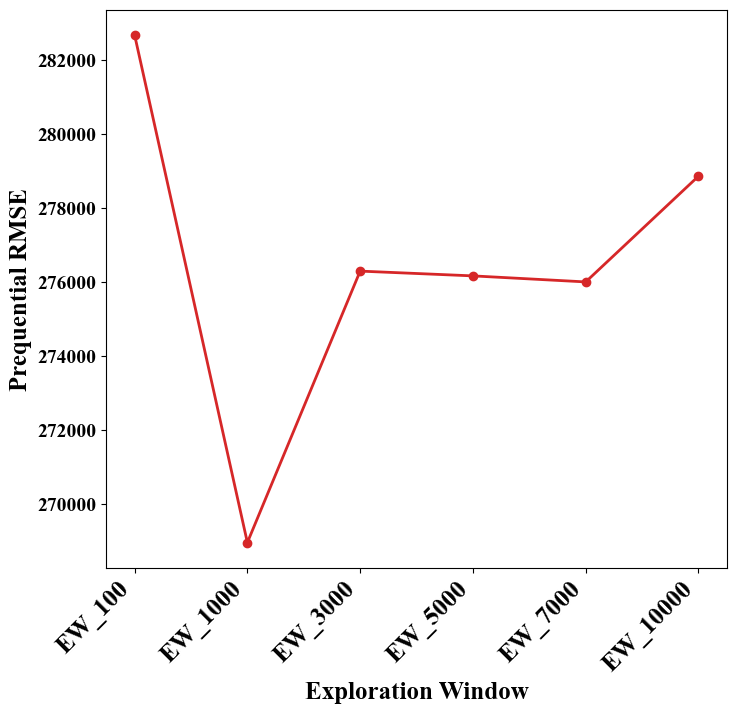

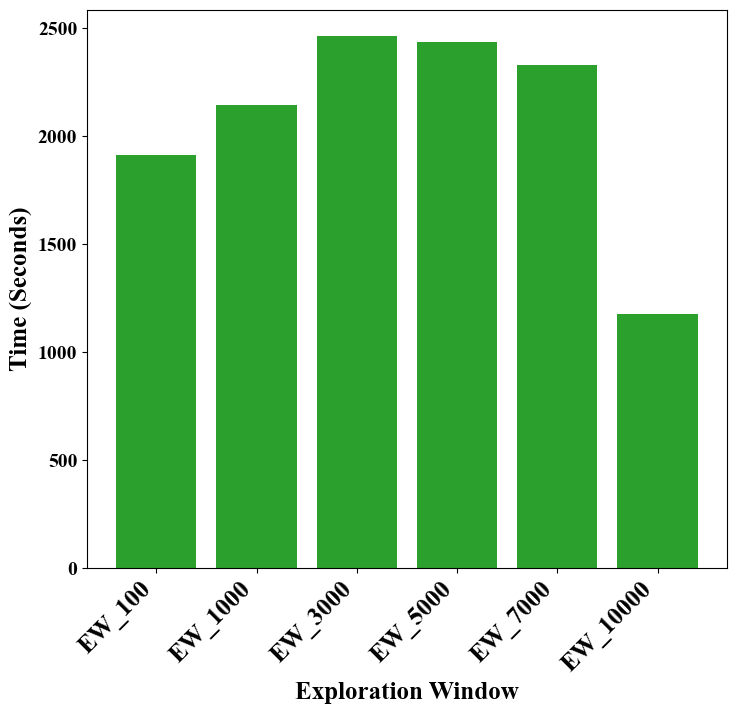

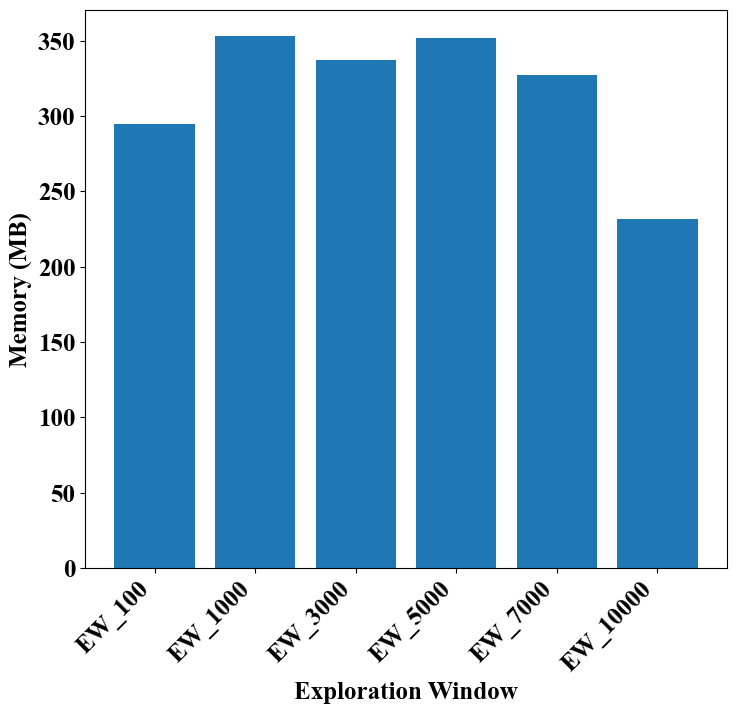

In [57]:
# Assuming temp_ew is your DataFrame
models = ["EW_" + str(i) for i in list(temp_ew.groupby(['exploration_window'])['rmse'].mean().index)]
rmse_score = [i * 100 for i in list(temp_ew.groupby(['exploration_window'])['rmse'].mean())]
time_seconds = list(temp_ew.groupby(['exploration_window'])['time'].mean())
memory_mb = list(temp_ew.groupby(['exploration_window'])['memory'].mean())

# Define the positions of the bars
x = np.arange(len(models))

# Plotting the RMSE Score
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(x, rmse_score, color='#d62728', marker='o', linestyle='-', linewidth=2, label='RMSE Score')
ax1.set_ylabel('Prequential RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax1.set_xlabel('Exploration Window', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.set_title('(a) RMSE', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/exploration_window_rmse_score.png', dpi=300)
plt.show()

# Plotting the Execution Time
fig, ax2 = plt.subplots(figsize=(8, 8))
bars_time = ax2.bar(x, time_seconds, color='#2ca02c', label='Time (Seconds)')
ax2.set_ylabel('Time (Seconds)', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax2.set_xlabel('Exploration Window', fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
#ax2.set_title('(b) Time', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/exploration_window_time_seconds.png', dpi=300)
plt.show()

# Plotting the Memory Usage
fig, ax3 = plt.subplots(figsize=(8, 8))
bars_memory = ax3.bar(x, memory_mb, color='#1f77b4', label='Memory (MB)')
ax3.set_ylabel('Memory (MB)', fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax3.set_xlabel('Exploration Window', fontsize=18)
ax3.tick_params(axis='x', labelsize=18)
#ax3.set_title('(c) Memory', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/exploration_window_memory_mb.png', dpi=300)
plt.show()

# Ensemble Size 

In [126]:
temp_es = df[(df['exploration_window']==1000) & (df['budget']==10) & (df['prediction_mode']=='ensemble')]

In [127]:
temp_es

,model,dataset,r2_score,rmse,exploration_window,ensemble_size,budget,prediction_mode,time,memory
1,ASML_REG,FriedmanGra,0.828298,2.064104,1000,11,10,ensemble,7167.456307,2603.414062
2,ASML_REG,FriedmanGra,0.832339,2.039673,1000,3,10,ensemble,2286.706051,321.062500
3,ASML_REG,FriedmanGra,0.837457,2.008299,1000,5,10,ensemble,2738.451130,773.707031
8,ASML_REG,FriedmanGra,0.842726,1.975482,1000,7,10,ensemble,3044.291953,771.687500
9,ASML_REG,FriedmanGra,0.840717,1.988057,1000,9,10,ensemble,4446.949938,1257.242188
...,...,...,...,...,...,...,...,...,...,...
183,ASML_REG,white_wine,0.383492,0.699035,1000,11,10,ensemble,95.263121,55.183594
184,ASML_REG,white_wine,0.356728,0.714047,1000,3,10,ensemble,33.616065,11.351562
185,ASML_REG,white_wine,0.376431,0.703027,1000,5,10,ensemble,42.878515,5.367188
190,ASML_REG,white_wine,0.380285,0.700851,1000,7,10,ensemble,51.469515,5.410156


In [128]:
#temp_es.sort_values(by='ensemble_size')

In [129]:
temp_es.groupby(['ensemble_size'])['rmse'].mean().sort_values(ascending=False)

ensemble_size
7     2749.887551
3     2736.892508
9     2711.295891
11    2694.453061
5     2689.539824
Name: rmse, dtype: float64

In [130]:
temp_es.groupby(['ensemble_size'])['time'].mean().sort_values(ascending=True)

ensemble_size
3     1833.802546
5     2141.035217
7     3258.457206
9     3866.000123
11    4127.191902
Name: time, dtype: float64

In [131]:
temp_es.groupby(['ensemble_size'])['memory'].mean().sort_values(ascending=True)

ensemble_size
3     165.647042
5     352.973158
7     553.127232
9     713.274554
11    908.599051
Name: memory, dtype: float64

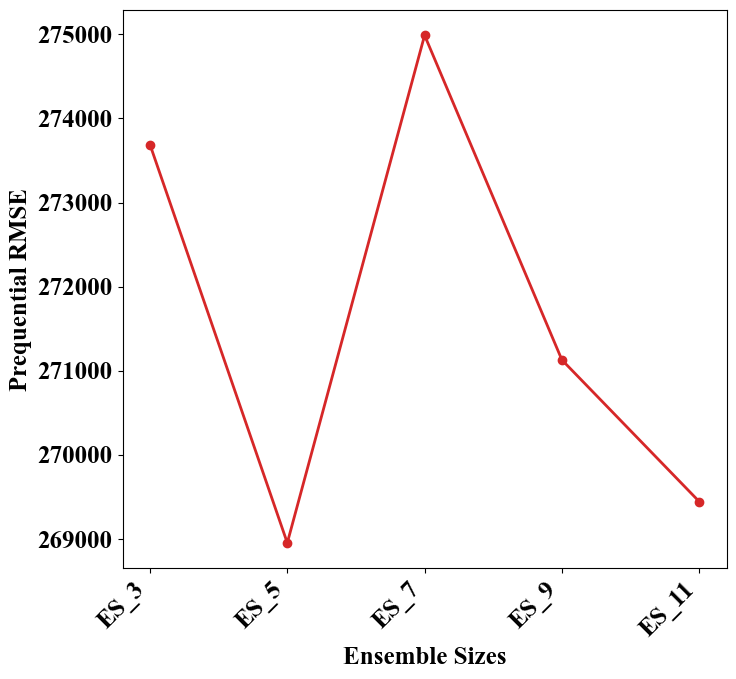

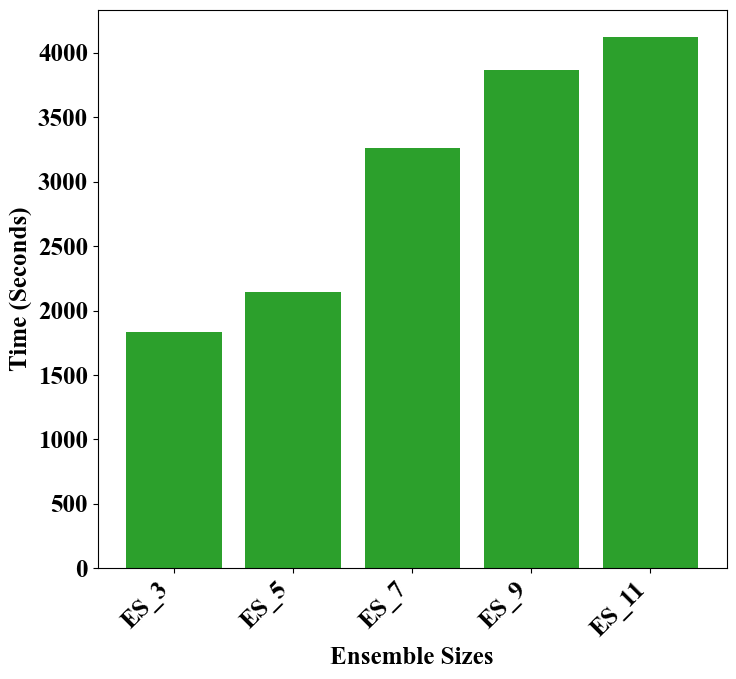

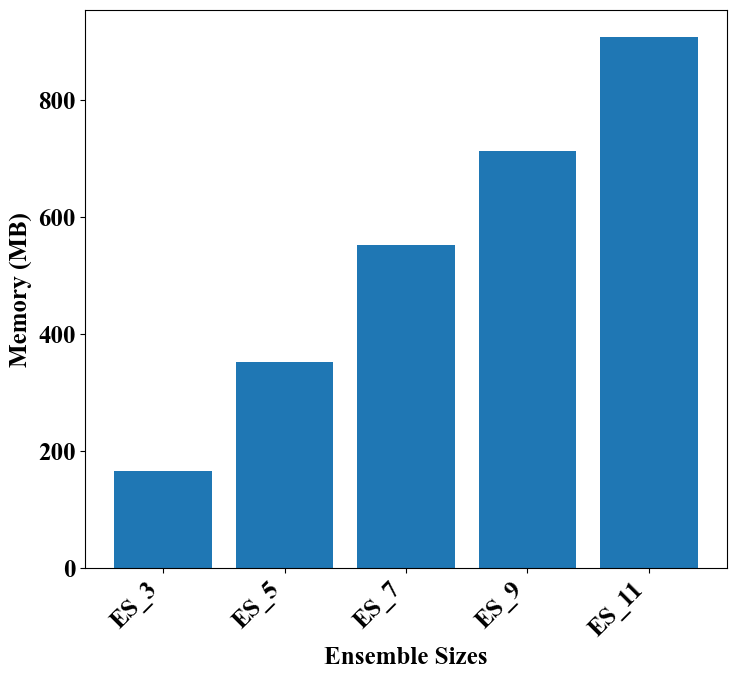

In [132]:
# Assuming temp_es is your DataFrame
models = ["ES_" + str(i) for i in list(temp_es.groupby(['ensemble_size'])['rmse'].mean().index)]
rmse_score = [i * 100 for i in list(temp_es.groupby(['ensemble_size'])['rmse'].mean())]
time_seconds = list(temp_es.groupby(['ensemble_size'])['time'].mean())
memory_mb = list(temp_es.groupby(['ensemble_size'])['memory'].mean())

# Define the positions of the bars
x = np.arange(len(models))

# Plotting the RMSE Score
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(x, rmse_score, color='#d62728', marker='o', linestyle='-', linewidth=2, label='RMSE Score')
ax1.set_ylabel('Prequential RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax1.set_xlabel('Ensemble Sizes', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.set_title('(a) RMSE', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/ensemble_size_rmse_score.png', dpi=300)
plt.show()

# Plotting the Execution Time
fig, ax2 = plt.subplots(figsize=(8, 8))
bars_time = ax2.bar(x, time_seconds, color='#2ca02c', label='Time (Seconds)')
ax2.set_ylabel('Time (Seconds)', fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax2.set_xlabel('Ensemble Sizes', fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
#ax2.set_title('(b) Time', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/ensemble_size_time_seconds.png', dpi=300)
plt.show()

# Plotting the Memory Usage
fig, ax3 = plt.subplots(figsize=(8, 8))
bars_memory = ax3.bar(x, memory_mb, color='#1f77b4', label='Memory (MB)')
ax3.set_ylabel('Memory (MB)', fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax3.set_xlabel('Ensemble Sizes', fontsize=18)
ax3.tick_params(axis='x', labelsize=18)
#ax3.set_title('(c) Memory', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/ensemble_size_memory_mb.png', dpi=300)
plt.show()

# Budget

In [133]:
temp_b = df[(df['exploration_window']==1000) & (df['ensemble_size']==5) & (df['prediction_mode']=='ensemble')]

In [134]:
temp_b

,model,dataset,r2_score,rmse,exploration_window,ensemble_size,budget,prediction_mode,time,memory
3,ASML_REG,FriedmanGra,0.837457,2.008299,1000,5,10,ensemble,2738.451130,773.707031
4,ASML_REG,FriedmanGra,0.828337,2.063870,1000,5,15,ensemble,3696.451740,783.367188
5,ASML_REG,FriedmanGra,0.839485,1.995733,1000,5,20,ensemble,4227.897738,757.343750
6,ASML_REG,FriedmanGra,0.830788,2.049085,1000,5,25,ensemble,4967.526336,860.011719
7,ASML_REG,FriedmanGra,0.836145,2.016387,1000,5,5,ensemble,2153.161606,753.878906
...,...,...,...,...,...,...,...,...,...,...
185,ASML_REG,white_wine,0.376431,0.703027,1000,5,10,ensemble,42.878515,5.367188
186,ASML_REG,white_wine,0.371768,0.705651,1000,5,15,ensemble,49.593615,2.503906
187,ASML_REG,white_wine,0.379435,0.701332,1000,5,20,ensemble,64.722287,21.445312
188,ASML_REG,white_wine,0.378866,0.701653,1000,5,25,ensemble,69.273390,6.941406


In [135]:
#temp_b.sort_values(by='budget')

In [136]:
temp_b.groupby(['budget'])['rmse'].mean().sort_values(ascending=False)

budget
25    2742.043890
5     2727.845629
15    2697.943333
20    2694.416557
10    2689.539824
Name: rmse, dtype: float64

In [137]:
temp_b.groupby(['budget'])['time'].mean().sort_values(ascending=True)

budget
5     1703.910661
10    2141.035217
15    2981.493401
20    3697.266652
25    4007.643955
Name: time, dtype: float64

In [138]:
temp_b.groupby(['budget'])['memory'].mean().sort_values(ascending=True)

budget
5     259.148717
10    352.973158
15    418.973772
25    422.035714
20    440.275391
Name: memory, dtype: float64

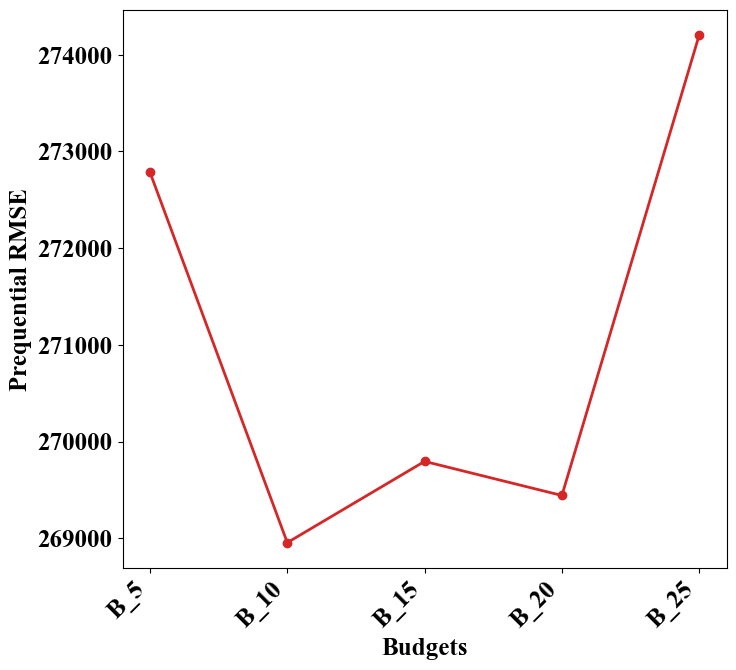

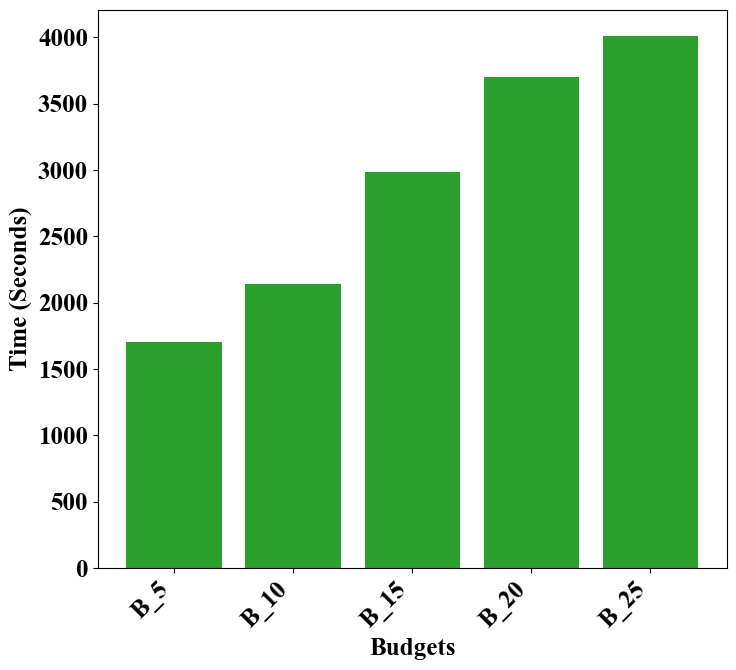

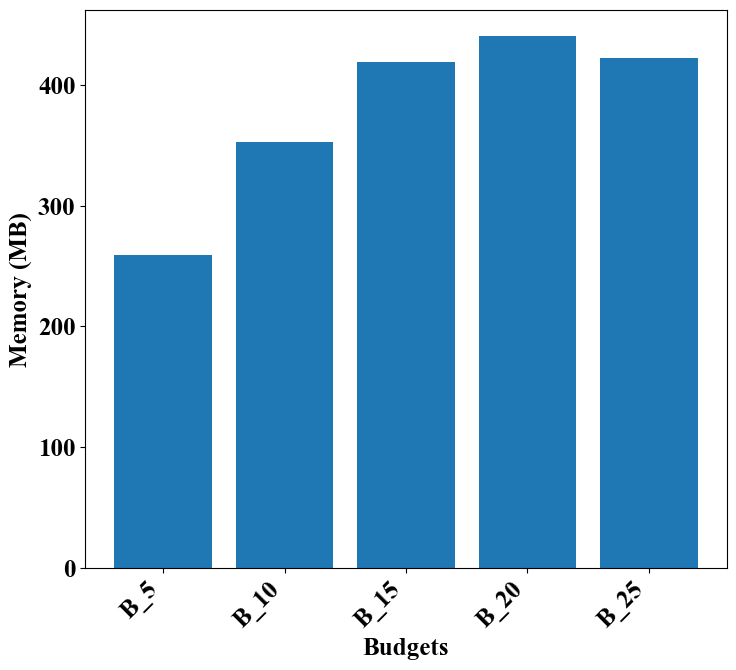

In [140]:
# Assuming temp_b is your DataFrame
models = ["B_" + str(i) for i in list(temp_b.groupby(['budget'])['rmse'].mean().index)]
rmse_score = [i * 100 for i in list(temp_b.groupby(['budget'])['rmse'].mean())]
time_seconds = list(temp_b.groupby(['budget'])['time'].mean())
memory_mb = list(temp_b.groupby(['budget'])['memory'].mean())

# Define the positions of the bars
x = np.arange(len(models))

# Plotting the RMSE Score
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(x, rmse_score, color='#d62728', marker='o', linestyle='-', linewidth=2, label='RMSE Score')
ax1.set_ylabel('Prequential RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax1.set_xlabel('Budgets', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
#ax1.set_title('(a) RMSE', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/budget_rmse_score.png', dpi=300)
plt.show()

# Plotting the Execution Time
fig, ax2 = plt.subplots(figsize=(8, 8))
bars_time = ax2.bar(x, time_seconds, color='#2ca02c', label='Time (Seconds)')
ax2.set_ylabel('Time (Seconds)', fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax2.set_xlabel('Budgets', fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
#ax2.set_title('(b) Time', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/budget_time_seconds.png', dpi=300)
plt.show()

# Plotting the Memory Usage
fig, ax3 = plt.subplots(figsize=(8, 8))
bars_memory = ax3.bar(x, memory_mb, color='#1f77b4', label='Memory (MB)')
ax3.set_ylabel('Memory (MB)', fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right', fontsize=14)
ax3.set_xlabel('Budgets', fontsize=18)
ax3.tick_params(axis='x', labelsize=18)
#ax3.set_title('(c) Memory', fontsize=20, y=-0.3)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f'CHARTS/budget_memory_mb.png', dpi=300)
plt.show()

# Prediction Mode

In [26]:
#you temp_pm = df[(df['exploration_window']==1000) & (df['ensemble_size']==3) & (df['budget']==10)]

In [27]:
#temp_pm

In [28]:
#temp_pm.sort_values(by='prediction_mode')

In [30]:
#temp_pm.groupby(['prediction_mode'])['r2_score'].median().sort_values(ascending=False)

In [31]:
#temp_pm.groupby(['prediction_mode'])['time'].median().sort_values(ascending=True)

In [32]:
#temp_pm.groupby(['prediction_mode'])['memory'].median().sort_values(ascending=True)